In [3]:
import numpy as np
import pandas as pd
import torch
from time import perf_counter_ns
from pathlib import Path
import os
from tqdm import tqdm_notebook as tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
src = Path('/home/alex/nkbtech/projects/stream_tools/notebooks')
dfs = []
for f in src.iterdir():
    if f.stem.startswith('benchmark'):
        dfs.append(pd.read_csv(f, index_col=0))
df = pd.concat(dfs, axis=0, ignore_index=True)

In [8]:
df.to_csv('benchmark_total.csv')

In [5]:
df.head()

,model,inf_size,inf_time_ms,img_w,img_h,img_size_MB,memory_used_MB
0,yolov8n.pt,640,207.915783,4213,1600,11.953365,1001.875
1,yolov8n.pt,640,210.823334,4054,1600,11.400310,1003.875
2,yolov8n.pt,640,94.801205,2859,1728,8.300271,1003.875
3,yolov8n.pt,640,78.155564,3774,1600,10.706492,1003.875
4,yolov8n.pt,640,73.534827,4457,1600,12.734117,1003.875


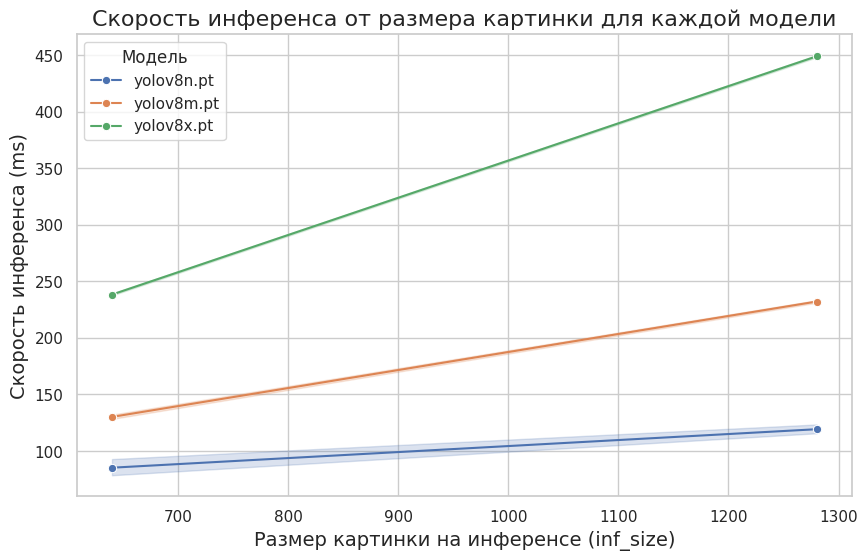

In [6]:
# Установка стиля
sns.set_theme(style="whitegrid")

# Создание фигуры и оси
plt.figure(figsize=(10, 6))

# Построение графика
sns.lineplot(data=df, x='inf_size', y='inf_time_ms', hue='model', marker='o')

# Настройка заголовка и меток осей
plt.title('Скорость инференса от размера картинки для каждой модели', fontsize=16)
plt.xlabel('Размер картинки на инференсе (inf_size)', fontsize=14)
plt.ylabel('Скорость инференса (ms)', fontsize=14)

# Отображение легенды
plt.legend(title='Модель')

# Показать график
plt.show()

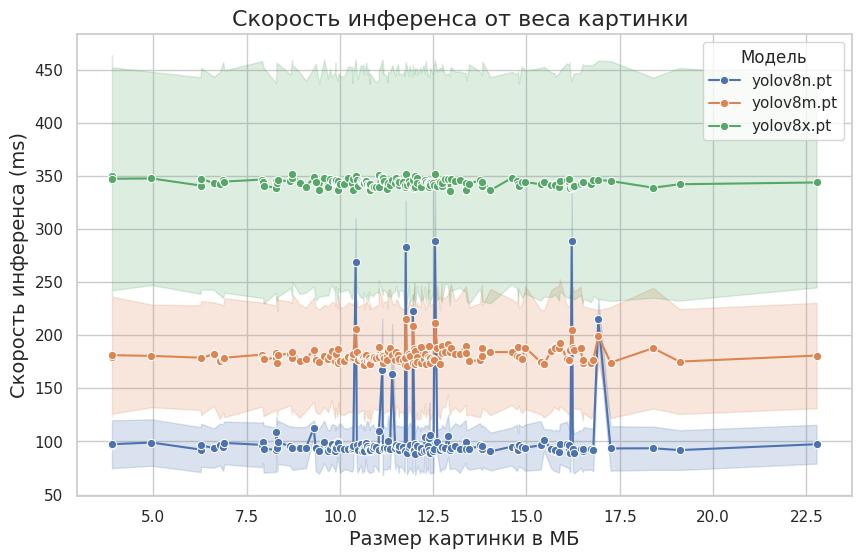

In [7]:
# Установка стиля
sns.set_theme(style="whitegrid")

# Создание фигуры и оси
plt.figure(figsize=(10, 6))

# Построение графика
sns.lineplot(data=df, x='img_size_MB', y='inf_time_ms', hue='model', marker='o')

# Настройка заголовка и меток осей
plt.title('Скорость инференса от веса картинки ', fontsize=16)
plt.xlabel('Размер картинки в МБ', fontsize=14)
plt.ylabel('Скорость инференса (ms)', fontsize=14)

# Отображение легенды
plt.legend(title='Модель')

# Показать график
plt.show()

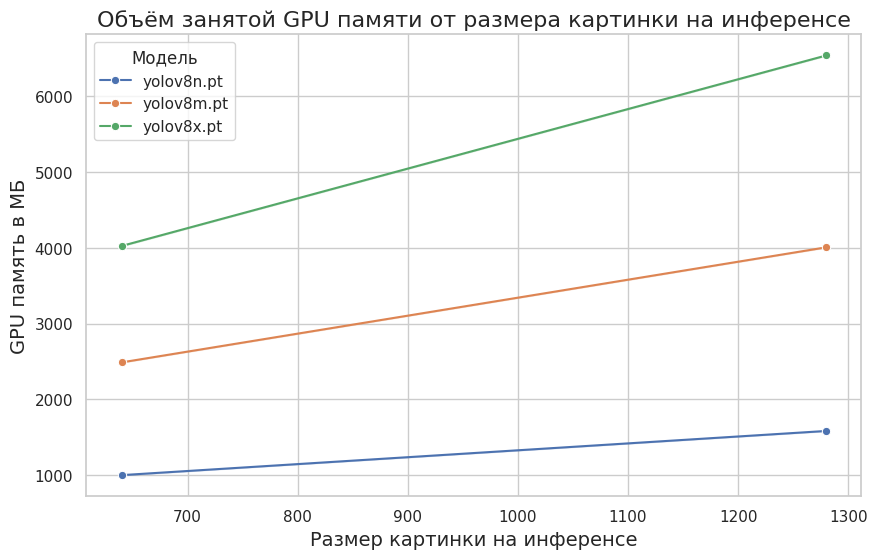

In [11]:
# Установка стиля
sns.set_theme(style="whitegrid")

# Создание фигуры и оси
plt.figure(figsize=(10, 6))

# Построение графика
sns.lineplot(data=df, x='inf_size', y='memory_used_MB', hue='model', marker='o')

# Настройка заголовка и меток осей
plt.title('Объём занятой GPU памяти от размера картинки на инференсе', fontsize=16)
plt.xlabel('Размер картинки на инференсе', fontsize=14)
plt.ylabel('GPU память в МБ', fontsize=14)

# Отображение легенды
plt.legend(title='Модель')

# Показать график
plt.show()